## Final Project

In [2]:
library(ggplot2)
library(ggpubr)
library(GGally)
library(dplyr)
library(tidyr)
library(moments)
library(car)
library(faraway)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘faraway’


The following objects are masked from ‘package:car’:

    logit, vif


The following object is masked from ‘package:GGally’:

    happy




1 $Life.expectancy$: Life expectancy in years.\
2 $Status$: Developing status for each country with 2-levels:\
– Developed\
– Developing\
3 $infant.deaths$: Number of infant deaths per 1000 population; value should be less than or equal to 1000.\
4 $Alcohol$: recorded per capita (15+) consumption (in litres of pure alcohol).\
5 $Hepatitis.B$: Hepatitis B (HepB) immunization coverage among 1-year-olds (%).\
6 $BMI$: Average Body Mass Index of entire population.\
7 $under.five.deaths$: Number of under-five deaths per 1000 population; value should be less than or equal to 1000.\
8 $Polio$: Polio (Pol3) immunization coverage among 1-year-olds (%).\
9 $Diphtheria$: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%).\
10 $GDP$ : Gross Domestic Product per capita (in USD).\
11 $Schooling$: Number of years of Schooling (in years).

In [3]:
# read data from RData file
life = get(load('FinalExam.RData'))

# change data type
life$Status = factor(life$Status)

In [4]:
head(life)
dim(life)

,Life.expectancy,Status,infant.deaths,Alcohol,Hepatitis.B,BMI,under.five.deaths,Polio,Diphtheria,GDP,Schooling
,<dbl>,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
6,58.8,Developing,74,0.01,66,16.7,102,66,66,553.3289,9.2
22,76.2,Developing,1,5.28,99,54.3,1,99,99,494.3588,12.5
38,74.7,Developing,21,0.45,95,53.9,24,95,95,4463.3947,13.6
54,49.6,Developing,78,7.80,77,2.4,121,81,77,3529.5348,9.0
70,75.6,Developing,0,7.84,98,44.4,0,99,98,12126.8761,14.1
86,75.5,Developing,10,8.15,94,59.8,11,95,94,1276.2650,16.8


[1] 183  11

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



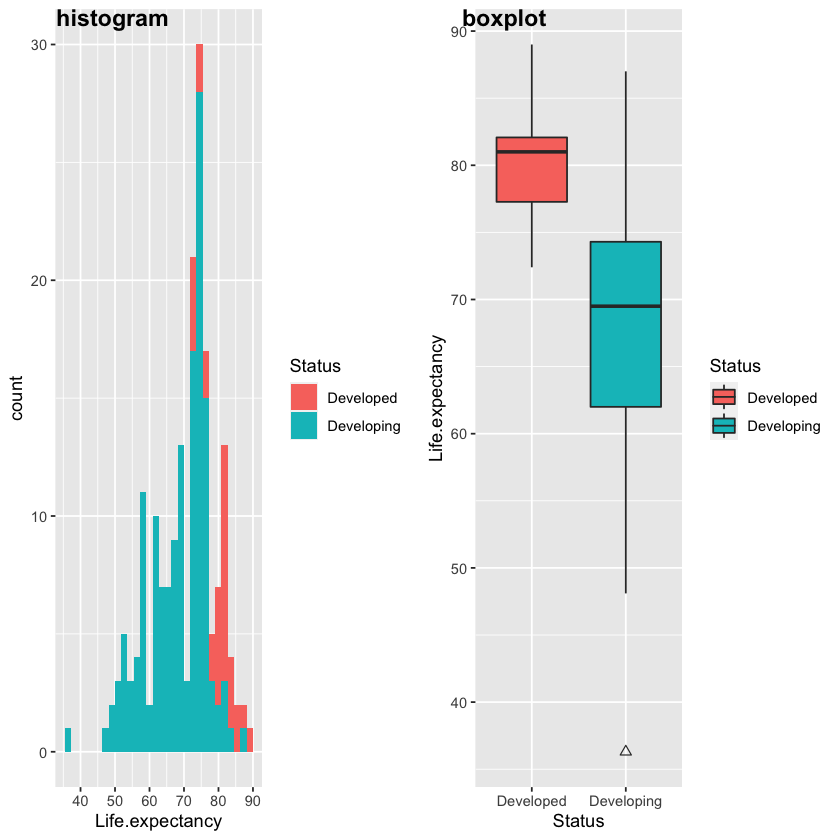

In [5]:
hst = ggplot(data = life, aes(x=Life.expectancy,fill=Status))+geom_histogram()
box = ggplot(data=life,aes(x=Status,y=Life.expectancy,fill=Status))+geom_boxplot(outlier.size = 2,outlier.shape = 2)
ggarrange(hst, box, labels = c("histogram", "boxplot"),ncol = 2, nrow = 1)

## 1 Introduction and Data Summary (10 points)
In this report, our scientific goal is to understand how these health and economical factors impact
the life expectancy of countries. Firstly, check the missingness or entry errors of the data. Report
notable issues. Report the missing data and potential data entry errors. If you find any missing
data and potential data entry errors, please clean the dataset by deleting the countries with missing
data and potential data entry in your analysis.
Secondly, summarize the demographics in this sample by reporting summary statistics for each
variable. Remember to code categorical data appropriately.
Thirdly, comment the collinearity between predictors in the training dataset.

#### (1) Check the missingness or entry errors of the data

##### a. missingness

In [6]:
# check missing values
life[!complete.cases(life),]

,Life.expectancy,Status,infant.deaths,Alcohol,Hepatitis.B,BMI,under.five.deaths,Polio,Diphtheria,GDP,Schooling
,<dbl>,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>
166,75.0,Developing,0,9.19,98,61.3,0,97,99,NA,12.6
310,68.7,Developing,9,3.95,91,49.3,12,9,91,NA,13.8
438,51.5,Developing,60,3.15,85,25.0,84,81,85,NA,NA
614,62.0,Developing,7,3.53,74,24.5,10,72,74,NA,10.5
695,77.5,Developed,0,12.69,99,63.6,0,99,99,NA,NA
711,69.0,Developing,8,3.12,93,3.3,10,99,93,NA,NA
727,57.4,Developing,239,1.81,6,19.1,321,76,6,NA,NA
743,79.2,Developed,0,10.28,NA,57.0,0,9,9,5841.4112,16.8
808,70.0,Developing,54,0.22,97,57.0,64,97,97,NA,12.2


There are 41 rows in our dataframe that contains missing values.

In [7]:
# remove rows containing na
life <- na.omit(life)

##### b.entry errors

In [8]:
# summarize data
summary(life)

 Life.expectancy        Status    infant.deaths        Alcohol      
 Min.   :48.10   Developed : 19   Min.   :   0.00   Min.   : 0.010  
 1st Qu.:63.55   Developing:123   1st Qu.:   0.00   1st Qu.: 1.173  
 Median :72.80                    Median :   2.50   Median : 3.895  
 Mean   :69.88                    Mean   :  30.45   Mean   : 4.639  
 3rd Qu.:75.60                    3rd Qu.:  20.75   3rd Qu.: 7.565  
 Max.   :89.00                    Max.   :1200.00   Max.   :14.970  
  Hepatitis.B         BMI        under.five.deaths     Polio      
 Min.   : 7.00   Min.   : 2.20   Min.   :   0.00   Min.   : 7.00  
 1st Qu.:75.25   1st Qu.:19.12   1st Qu.:   1.00   1st Qu.:82.00  
 Median :92.00   Median :43.15   Median :   3.00   Median :93.50  
 Mean   :80.18   Mean   :37.87   Mean   :  41.92   Mean   :84.07  
 3rd Qu.:96.00   3rd Qu.:57.38   3rd Qu.:  24.00   3rd Qu.:97.00  
 Max.   :99.00   Max.   :75.20   Max.   :1600.00   Max.   :99.00  
   Diphtheria         GDP             Schooling 

According to the description, we know that $infant.deaths$ and $under.five.deaths$ should be equal or less than 1000. However the maximum of $i$nfant.deaths$ is 1200.00 and the maximum of under.five.deaths$ is 1600.00. Therefor there are some entry errors for the two variables, we are supposed to filter these errors. 

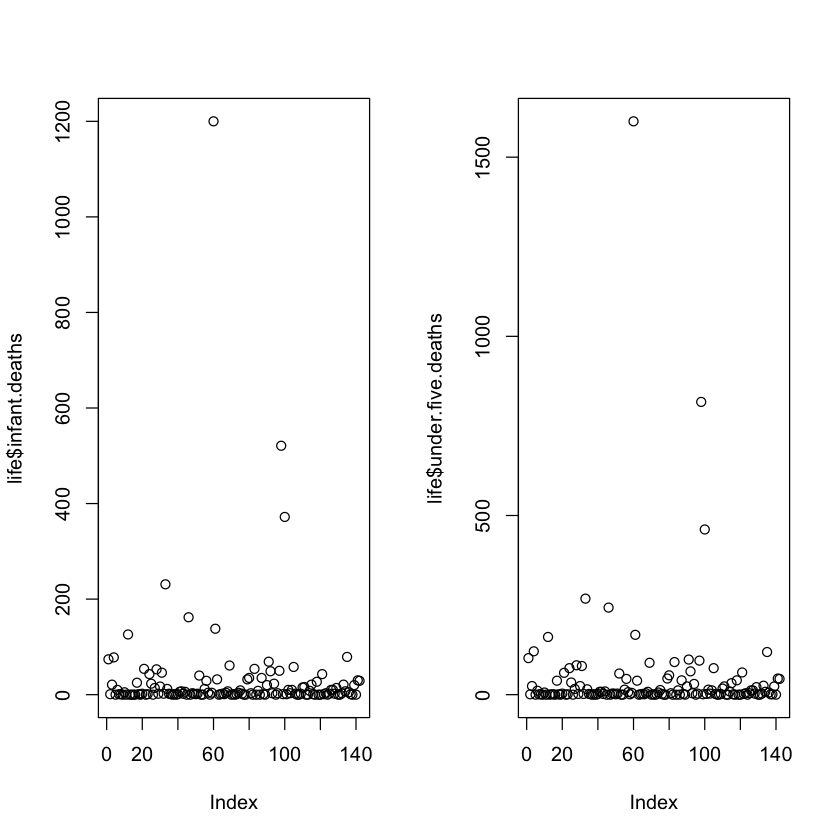

In [9]:
par(mfrow=c(1,2))
plot(life$infant.deaths)
plot(life$under.five.deaths)

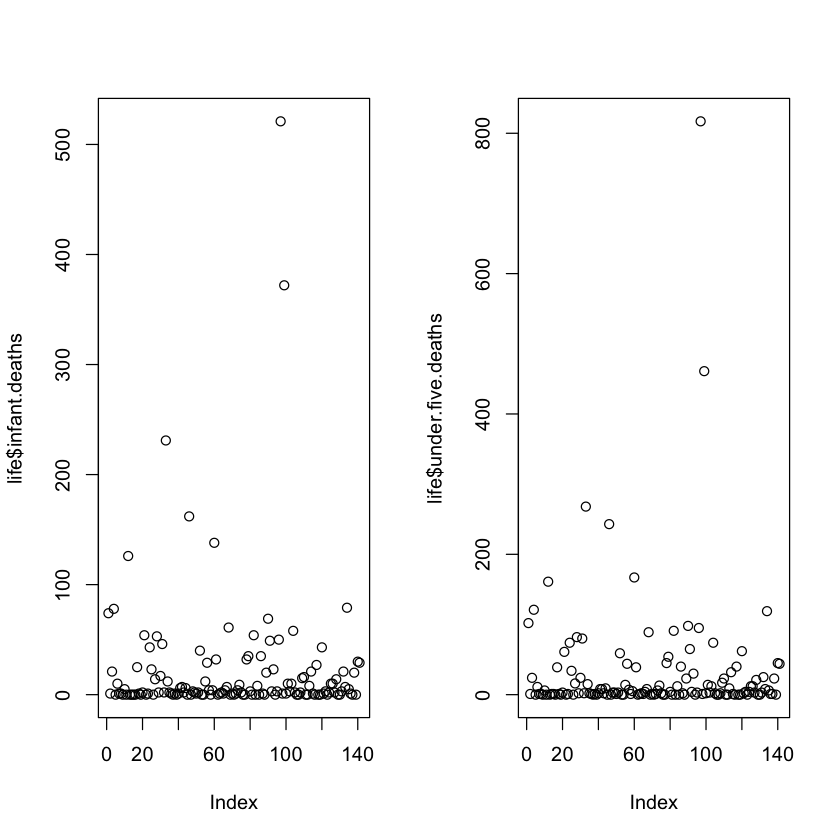

In [10]:
# filter the data
life = life %>% filter(infant.deaths <= 1000) %>% filter(under.five.deaths <= 1000)

par(mfrow=c(1,2))
plot(life$infant.deaths)
plot(life$under.five.deaths)

#### (2) summarize the demographics

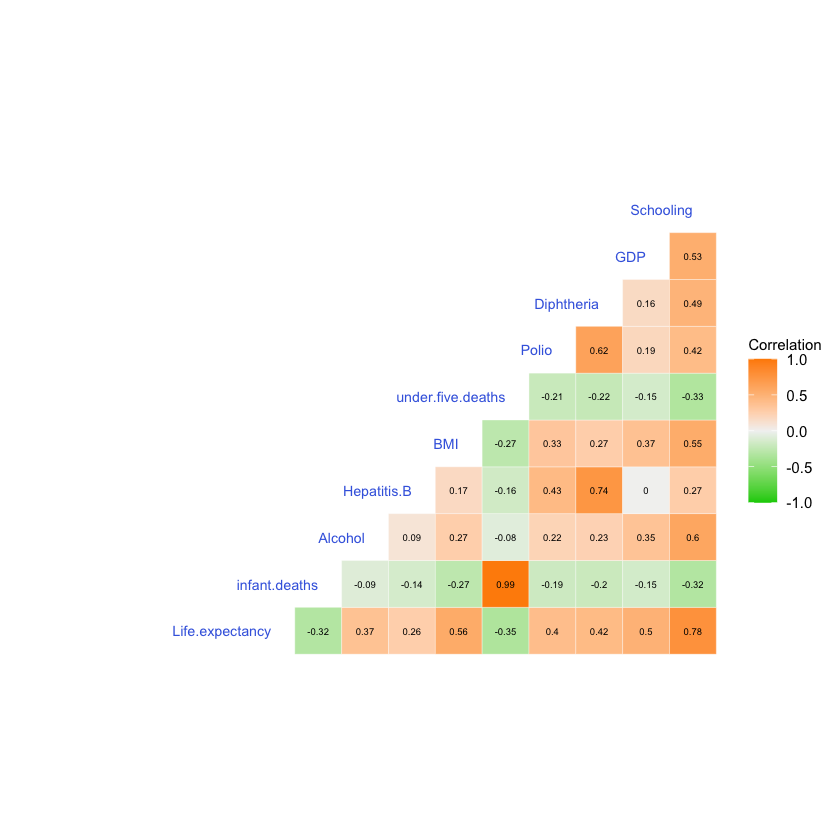

In [11]:
# numerical data
life_num = life %>% select_if(is.numeric)
ggcorr(life_num, label = T, label_size = 2, label_round = 2, hjust = 1, size = 3, 
       color = "royalblue", layout.exp = 5, low = "green3", mid = "gray95", high = "darkorange", name = "Correlation")

The $Life.expectancy$ as dependent variable has somewhat strong positive correlation with $Schooling$, we are going to see it further on the model analysis. On the other hand, it has negative correlation with $Infant.death$, it is valid since $infant.death$ usually happens at a very young age.

Status,count,percentage
<fct>,<int>,<chr>
Developed,19,13.48%
Developing,122,86.52%


             Df Sum Sq Mean Sq F value   Pr(>F)    
Status        1   2252  2252.5   36.46 1.34e-08 ***
Residuals   139   8587    61.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

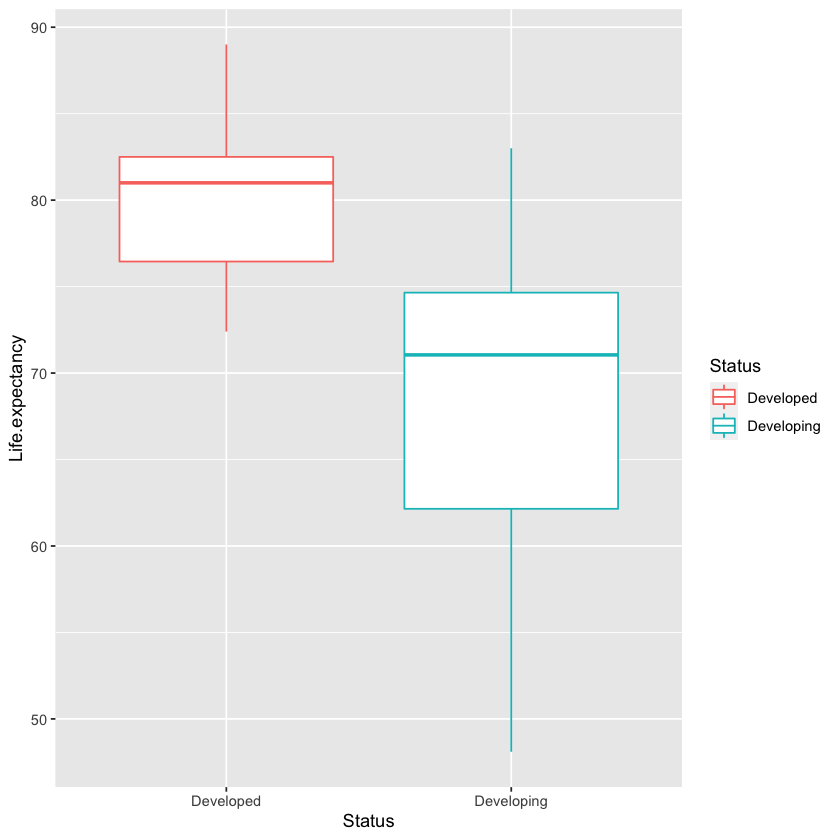

In [12]:
# categorical data
life %>% group_by(Status) %>% summarise(count = n()) %>% mutate(percentage = paste0(round(count/sum(count)*100, 2), "%"))

ggplot(life, aes(Status, Life.expectancy, color = Status))+geom_boxplot(outlier.colour="black", outlier.shape=16,outlier.size=3, notch=FALSE)

summary(aov(Life.expectancy ~ Status, data = life))


The number of Developing Countries on this observations are way bigger than the Developed Countries. On the Development Status, it was clearly that distribution of higher $Life.expectancy$ lies on the Developed Countries, with a significant Median distance. As the $p$-value ANOVA Analysis is less than the significance level 0.05, we can conclude that there are significant differences of Life Expectancy between the Developed and Developing Countries.

#### (3) comment the colinearity between the data

In [13]:
train_data = life[1:115,]
test_data = life[-c(1:115),]
life_model <- lm(Life.expectancy ~., data = train_data)
summary(life_model)


Call:
lm(formula = Life.expectancy ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.0755  -2.8057   0.3676   3.0179  10.4312 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.779e+01  3.425e+00  13.953  < 2e-16 ***
StatusDeveloping  -2.796e+00  1.774e+00  -1.576  0.11800    
infant.deaths      1.545e-01  5.626e-02   2.746  0.00711 ** 
Alcohol           -2.394e-01  1.692e-01  -1.415  0.16017    
Hepatitis.B       -2.170e-02  2.694e-02  -0.805  0.42249    
BMI                6.212e-02  2.675e-02   2.322  0.02217 *  
under.five.deaths -1.143e-01  3.960e-02  -2.885  0.00476 ** 
Polio             -9.302e-03  3.099e-02  -0.300  0.76468    
Diphtheria         5.114e-02  4.166e-02   1.227  0.22241    
GDP                4.416e-05  5.318e-05   0.830  0.40817    
Schooling          1.754e+00  2.717e-01   6.456 3.49e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard err

One of the first things we should notice is that the F-test for the regression tells us that the regression is significant, however some individuals predictor is not. This happens as a result of the predictors being highly correlated.

In [14]:
data.frame(vif(life_model))

,vif.life_model.
,<dbl>
StatusDeveloping,1.874758
infant.deaths,66.175794
Alcohol,2.208582
Hepatitis.B,2.018049
BMI,1.554635
under.five.deaths,67.467059
Polio,2.295877
Diphtheria,3.781750
GDP,1.753947


In [15]:
X = model.matrix(life_model)[, -1]
round(cor(X),2)

,StatusDeveloping,infant.deaths,Alcohol,Hepatitis.B,BMI,under.five.deaths,Polio,Diphtheria,GDP,Schooling
StatusDeveloping,1.00,0.15,-0.60,-0.06,-0.31,0.15,-0.18,-0.18,-0.52,-0.50
infant.deaths,0.15,1.00,-0.12,-0.15,-0.27,0.99,-0.19,-0.22,-0.16,-0.33
Alcohol,-0.60,-0.12,1.00,0.16,0.29,-0.11,0.25,0.33,0.40,0.63
Hepatitis.B,-0.06,-0.15,0.16,1.00,0.21,-0.17,0.50,0.69,-0.01,0.27
BMI,-0.31,-0.27,0.29,0.21,1.00,-0.27,0.33,0.34,0.42,0.56
under.five.deaths,0.15,0.99,-0.11,-0.17,-0.27,1.00,-0.21,-0.25,-0.16,-0.34
Polio,-0.18,-0.19,0.25,0.50,0.33,-0.21,1.00,0.74,0.20,0.45
Diphtheria,-0.18,-0.22,0.33,0.69,0.34,-0.25,0.74,1.00,0.20,0.54
GDP,-0.52,-0.16,0.40,-0.01,0.42,-0.16,0.20,0.20,1.00,0.56
Schooling,-0.50,-0.33,0.63,0.27,0.56,-0.34,0.45,0.54,0.56,1.00


The VIF of $infant.deaths$ and $under.five.deaths$ are 66.175794 and 67.467059 respectively. And the correlation between the two variables is 0.99. Both tell us that the two variables are highly corelated. This strong correlation indicates multicollinearity among them. Therefore, we are going to deselect $under.5.deaths$, with consideration that other variables seems more related with conditions during infants period.

## 2 Data Analysis (20 points)
Hint: Note that the training dataset is used to create the model, and the testing dataset is used
to evaluate the model fitting. After selecting the final model, please remember to use the whole
cleaned dataset to refit the selected model and interpret your results.

### 2.1 Data Analysis A.1 (10 points)
The investigator want to find the health and economical factors can significantly affect the life
expectancy. Create a model to investigate the association between these health and economical
factors and the life expectancy of countries. In this step, you do not need to consider interaction
terms in your model. To build the final model to answer this question, you need to use model
diagnostic tools to evaluate the model. If you find any problems in model diagnostic, you may
consider the following tools to build final model\
•Identify and deal with unusual points (leverage points, outliers, influential points)\
•Variable transformation\
•Variable selection\
•Robust method\
Please state your final model with justification. Check the performance of your final linear regression
model. Summarize your findings from the final model.

##### a.simple linear regression-remove under.five.deaths

In [16]:
mod1 <- lm(formula = Life.expectancy ~ Status + infant.deaths + Alcohol+ Hepatitis.B 
            + BMI + Polio+ Diphtheria + GDP + Schooling, data = train_data)
summary(mod1)

train_predict1 <- predict.lm(mod1, train_data)
(train_mse_OLS1 <- mean((train_predict1 - train_data$Life.expectancy)^2))

test_predict1 = predict.lm(mod1, test_data)
(test_mse_OLS1 = mean((test_predict1 - test_data$Life.expectancy)^2))


Call:
lm(formula = Life.expectancy ~ Status + infant.deaths + Alcohol + 
    Hepatitis.B + BMI + Polio + Diphtheria + GDP + Schooling, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4151  -3.1769   0.5027   3.0220  10.6207 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.603e+01  3.486e+00  13.205  < 2e-16 ***
StatusDeveloping -3.051e+00  1.832e+00  -1.665   0.0989 .  
infant.deaths    -6.393e-03  7.686e-03  -0.832   0.4074    
Alcohol          -3.474e-01  1.707e-01  -2.036   0.0443 *  
Hepatitis.B      -1.495e-02  2.776e-02  -0.539   0.5913    
BMI               5.924e-02  2.765e-02   2.142   0.0345 *  
Polio            -6.419e-03  3.204e-02  -0.200   0.8416    
Diphtheria        5.843e-02  4.301e-02   1.359   0.1772    
GDP               3.875e-05  5.497e-05   0.705   0.4823    
Schooling         1.857e+00  2.785e-01   6.669 1.24e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 

[1] 23.7446

[1] 40.5546

In [23]:
step(mod1)

ERROR: Error in step(mod1) = lm(Life.expectancy ~ Status + Alcohol + BMI + Diphtheria + : could not find function "step<-"


##### b. simple linear regression-add new features

In [18]:
# 9 + 8 * 3 + 8 + 7 + 6 + 5 + 4 + 3 + 2 + 1 = 9 + 32 + 28 = 69 
mod2 <- lm(formula = Life.expectancy ~ Status + infant.deaths + Alcohol+ Hepatitis.B 
            + BMI + Polio + Diphtheria + GDP + Schooling 
            + I(infant.deaths ^ 2) + I(Alcohol ^ 2) + I(Hepatitis.B ^ 2) + I(BMI ^2)
            + I(Polio ^ 2) + I(Diphtheria ^ 2) + I(GDP ^ 2) + I(Schooling ^ 2)
            + I(infant.deaths ^ 3) + I(Alcohol ^ 3) + I(Hepatitis.B ^ 3) + I(BMI ^3)
            + I(Polio ^ 3) + I(Diphtheria ^ 3) + I(GDP ^ 3) + I(Schooling ^ 3)
            + I(infant.deaths ^ 4) + I(Alcohol ^ 4) + I(Hepatitis.B ^ 4) + I(BMI ^4)
            + I(Polio ^ 4) + I(Diphtheria ^ 4) + I(GDP ^ 4) + I(Schooling ^ 4)
            + Status * infant.deaths + Status * Alcohol + Status * Hepatitis.B
            + Status * BMI + Status * Polio + Status * Diphtheria + Status * GDP + Status * Schooling
            + infant.deaths * Alcohol + infant.deaths * Hepatitis.B + infant.deaths * BMI
            + infant.deaths * Polio + infant.deaths * Diphtheria + infant.deaths * GDP + infant.deaths * Schooling
            + Alcohol * Hepatitis.B + Alcohol * BMI + Alcohol * Polio
            + Alcohol * Diphtheria + Alcohol * GDP + Alcohol * Schooling
            + Hepatitis.B * BMI + Hepatitis.B * Polio
            + Hepatitis.B * Diphtheria + Hepatitis.B * GDP + Hepatitis.B * Schooling
            + BMI * Polio + BMI * Diphtheria 
            + BMI * GDP + BMI * Schooling
            + Polio * Diphtheria + Polio * GDP + Polio * Schooling
            + Diphtheria * GDP + Diphtheria * Schooling + GDP * Schooling, data = train_data)
summary(mod2)
train_predict2 <- predict.lm(mod2, train_data)
(train_mse_OLS2 <- mean((train_predict2 - train_data$Life.expectancy)^2))

test_predict2 = predict.lm(mod2, test_data)
(test_mse_OLS2 = mean((test_predict2 - test_data$Life.expectancy)^2))


Call:
lm(formula = Life.expectancy ~ Status + infant.deaths + Alcohol + 
    Hepatitis.B + BMI + Polio + Diphtheria + GDP + Schooling + 
    I(infant.deaths^2) + I(Alcohol^2) + I(Hepatitis.B^2) + I(BMI^2) + 
    I(Polio^2) + I(Diphtheria^2) + I(GDP^2) + I(Schooling^2) + 
    I(infant.deaths^3) + I(Alcohol^3) + I(Hepatitis.B^3) + I(BMI^3) + 
    I(Polio^3) + I(Diphtheria^3) + I(GDP^3) + I(Schooling^3) + 
    I(infant.deaths^4) + I(Alcohol^4) + I(Hepatitis.B^4) + I(BMI^4) + 
    I(Polio^4) + I(Diphtheria^4) + I(GDP^4) + I(Schooling^4) + 
    Status * infant.deaths + Status * Alcohol + Status * Hepatitis.B + 
    Status * BMI + Status * Polio + Status * Diphtheria + Status * 
    GDP + Status * Schooling + infant.deaths * Alcohol + infant.deaths * 
    Hepatitis.B + infant.deaths * BMI + infant.deaths * Polio + 
    infant.deaths * Diphtheria + infant.deaths * GDP + infant.deaths * 
    Schooling + Alcohol * Hepatitis.B + Alcohol * BMI + Alcohol * 
    Polio + Alcohol * Diphtheria + Alco

[1] 6.797346

[1] 1668.128

##### c. AIC

In [19]:
AICSelect = step(mod2)

Start:  AIC=360.4
Life.expectancy ~ Status + infant.deaths + Alcohol + Hepatitis.B + 
    BMI + Polio + Diphtheria + GDP + Schooling + I(infant.deaths^2) + 
    I(Alcohol^2) + I(Hepatitis.B^2) + I(BMI^2) + I(Polio^2) + 
    I(Diphtheria^2) + I(GDP^2) + I(Schooling^2) + I(infant.deaths^3) + 
    I(Alcohol^3) + I(Hepatitis.B^3) + I(BMI^3) + I(Polio^3) + 
    I(Diphtheria^3) + I(GDP^3) + I(Schooling^3) + I(infant.deaths^4) + 
    I(Alcohol^4) + I(Hepatitis.B^4) + I(BMI^4) + I(Polio^4) + 
    I(Diphtheria^4) + I(GDP^4) + I(Schooling^4) + Status * infant.deaths + 
    Status * Alcohol + Status * Hepatitis.B + Status * BMI + 
    Status * Polio + Status * Diphtheria + Status * GDP + Status * 
    Schooling + infant.deaths * Alcohol + infant.deaths * Hepatitis.B + 
    infant.deaths * BMI + infant.deaths * Polio + infant.deaths * 
    Diphtheria + infant.deaths * GDP + infant.deaths * Schooling + 
    Alcohol * Hepatitis.B + Alcohol * BMI + Alcohol * Polio + 
    Alcohol * Diphtheria + Alcoho

In [27]:
AICmod = lm(Life.expectancy ~ Status + infant.deaths + Alcohol + Hepatitis.B + 
    BMI + Polio + Diphtheria + GDP + Schooling + I(BMI^2) + I(Schooling^2) + 
    I(Alcohol^3) + I(BMI^3) + I(Polio^3) + I(Diphtheria^3) + 
    I(GDP^3) + I(Schooling^3) + I(Hepatitis.B^4) + I(BMI^4) + 
    I(Polio^4) + I(Diphtheria^4) + I(GDP^4) + I(Schooling^4) + 
    Status:infant.deaths + Status:Alcohol + Status:Hepatitis.B + 
    Status:BMI + Status:Polio + Status:Diphtheria + Status:GDP + 
    Status:Schooling + infant.deaths:Alcohol + infant.deaths:Hepatitis.B + 
    infant.deaths:Polio + infant.deaths:Diphtheria + Alcohol:Hepatitis.B + 
    Alcohol:BMI + Alcohol:Polio + Alcohol:Diphtheria + Alcohol:GDP + 
    Alcohol:Schooling + Hepatitis.B:BMI + Hepatitis.B:Diphtheria + 
    Hepatitis.B:Schooling + BMI:Schooling + Polio:Diphtheria + 
    Polio:GDP + Polio:Schooling + Diphtheria:GDP + Diphtheria:Schooling, data = train_data)

summary(AICmod)

AICtrain_predict = predict.lm(AICmod, train_data)
(AICtrain_mse_OLS = mean((AICtrain_predict - train_data$Life.expectancy)^2))

AICtest_predict = predict.lm(AICmod, test_data)
(AICtest_mse_ols = mean((AICtest_predict - test_data$Life.expectancy)^2))


Call:
lm(formula = Life.expectancy ~ Status + Alcohol + BMI + Schooling, 
    data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7858  -3.7825   0.9329   3.2392  11.1673 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      45.74916    3.15438  14.503  < 2e-16 ***
StatusDeveloping -3.11879    1.70380  -1.830   0.0699 .  
Alcohol          -0.35621    0.16780  -2.123   0.0360 *  
BMI               0.06541    0.02683   2.438   0.0164 *  
Schooling         2.13559    0.23484   9.094 4.65e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.072 on 110 degrees of freedom
Multiple R-squared:  0.6736,	Adjusted R-squared:  0.6617 
F-statistic: 56.75 on 4 and 110 DF,  p-value: < 2.2e-16


[1] 24.60459

[1] 37.84986

O

##### d.BIC

In [21]:
BICSelect = step(mod2, k = log(53))

Start:  AIC=498.32
Life.expectancy ~ Status + infant.deaths + Alcohol + Hepatitis.B + 
    BMI + Polio + Diphtheria + GDP + Schooling + I(infant.deaths^2) + 
    I(Alcohol^2) + I(Hepatitis.B^2) + I(BMI^2) + I(Polio^2) + 
    I(Diphtheria^2) + I(GDP^2) + I(Schooling^2) + I(infant.deaths^3) + 
    I(Alcohol^3) + I(Hepatitis.B^3) + I(BMI^3) + I(Polio^3) + 
    I(Diphtheria^3) + I(GDP^3) + I(Schooling^3) + I(infant.deaths^4) + 
    I(Alcohol^4) + I(Hepatitis.B^4) + I(BMI^4) + I(Polio^4) + 
    I(Diphtheria^4) + I(GDP^4) + I(Schooling^4) + Status * infant.deaths + 
    Status * Alcohol + Status * Hepatitis.B + Status * BMI + 
    Status * Polio + Status * Diphtheria + Status * GDP + Status * 
    Schooling + infant.deaths * Alcohol + infant.deaths * Hepatitis.B + 
    infant.deaths * BMI + infant.deaths * Polio + infant.deaths * 
    Diphtheria + infant.deaths * GDP + infant.deaths * Schooling + 
    Alcohol * Hepatitis.B + Alcohol * BMI + Alcohol * Polio + 
    Alcohol * Diphtheria + Alcoh

In [22]:
BICmod = lm(Life.expectancy ~ Status + infant.deaths + Alcohol + Hepatitis.B + 
    BMI + Polio + Diphtheria + GDP + Schooling + I(BMI^2) + I(Schooling^2) + 
    # I(BMI^3) + I(Polio^3) + I(Diphtheria^3) + I(GDP^3) + I(Schooling^3) + 
    # I(Hepatitis.B^4) + I(BMI^4) + I(Polio^4) + I(Diphtheria^4) + 
    # I(GDP^4) + I(Schooling^4) + 
    Status:infant.deaths + Status:Alcohol + 
    Status:Polio + Status:Diphtheria + Status:GDP + infant.deaths:Alcohol + 
    infant.deaths:Hepatitis.B + infant.deaths:Polio + infant.deaths:Diphtheria + 
    Alcohol:Hepatitis.B + Alcohol:Polio + Alcohol:Diphtheria + 
    Alcohol:GDP + Hepatitis.B:BMI + Hepatitis.B:Diphtheria + 
    Hepatitis.B:Schooling + BMI:Schooling + Polio:Diphtheria + 
    Polio:Schooling + Diphtheria:Schooling, data = train_data)

summary(BICmod)

BICtrain_predict = predict.lm(BICmod, train_data)
(BICtrain_mse_OLS = mean((BICtrain_predict - train_data$Life.expectancy)^2))

BICtest_predict = predict.lm(BICmod, test_data)
(BICtest_mse_ols = mean((BICtest_predict - test_data$Life.expectancy)^2))


Call:
lm(formula = Life.expectancy ~ Status + infant.deaths + Alcohol + 
    Hepatitis.B + BMI + Polio + Diphtheria + GDP + Schooling + 
    I(BMI^2) + I(Schooling^2) + Status:infant.deaths + Status:Alcohol + 
    Status:Polio + Status:Diphtheria + Status:GDP + infant.deaths:Alcohol + 
    infant.deaths:Hepatitis.B + infant.deaths:Polio + infant.deaths:Diphtheria + 
    Alcohol:Hepatitis.B + Alcohol:Polio + Alcohol:Diphtheria + 
    Alcohol:GDP + Hepatitis.B:BMI + Hepatitis.B:Diphtheria + 
    Hepatitis.B:Schooling + BMI:Schooling + Polio:Diphtheria + 
    Polio:Schooling + Diphtheria:Schooling, data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.8564  -2.1615   0.7524   2.3110   8.5090 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     9.116e+01  2.564e+01   3.555 0.000627 ***
StatusDeveloping               -4.352e+01  2.386e+01  -1.824 0.071751 .  
infant.deaths                  -3.77

[1] 15.87096

[1] 41.04262

### 2.2 Data Analysis A.2 (10 points)
Based on the significant factors you found in Analysis A.1, the investigator want to find whether
some of these significant health and economical factors (except for Status) have different effects
between developed and developing countries. Please create a model with justification to answer
this question.


## 3 Discussion (5 points)
State your conclusions regarding the influence of these health and economic factors on life ex-
pectancy, and summarize the main results supporting your conclusions. Discuss the implications
of your findings. What are some limitations of the current study? Include a discussion of possible
violations of model assumptions. What are some possible interactions we ignored?

## 4 Lay Abstract (5 points)
Write a lay abstract (approximately 200 words) that summarizes your research aims and findings
for a general audience. The target audience is policy makers and scientists with more general
training, and should not include any mathematical notation or technical terms (e.g., do not say
“linear regression model”). It is easiest to write this last, but please include this at the beginning
of your report.